# Predict age from methylation

### Using data from this article
https://www.ncbi.nlm.nih.gov/pubmed/23177740?dopt=Abstract

---

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
import sklearn.metrics as m
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load age metadata

In [2]:
meta=pd.read_csv('data/sample_all.csv')[['Title']]
#parse age from title
meta['age']=[int(x.split('age ')[1].split('y')[0]) 
             for x in meta['Title']]
#parse id from title
meta['id']=['X'+x.split()[-1] for x in meta['Title']]

### Load data

In [3]:
data=pd.read_csv('data/GSE40279_average_beta.txt.gz',sep='\t')
#basically transpose
data=data.set_index('ID_REF')
data=data.transpose().reset_index()
data=data.rename(columns={'index':'id'})
#merge with age
data=data.merge(meta[['id','age']],on='id').set_index('id')

### Create data matrices

In [4]:
x=data.values[:,:-1]
y=data['age'].values

In [5]:
x=StandardScaler().fit_transform(x)

### CV model

In [6]:
model=LinearRegression()
y_pred=cross_val_predict(model,x,y,cv=10)

### Plot results

0.879631322124


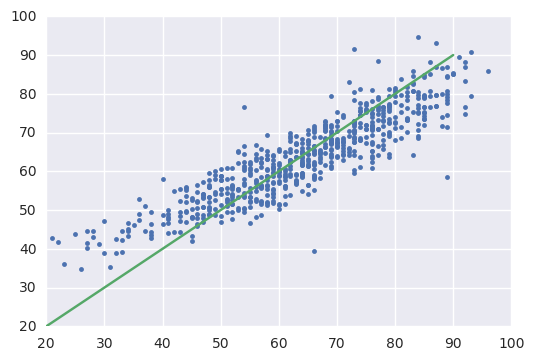

In [7]:
plt.plot(y,y_pred,'.')
plt.plot([15,90],[15,90])
plt.xlim(20,100)
plt.ylim(20,100)
print np.corrcoef(y,y_pred)[0,1]

### Plot errors

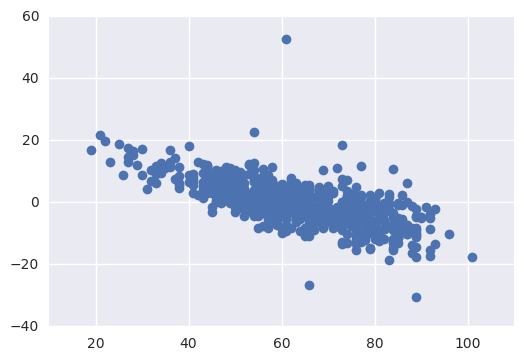

In [8]:
plt.plot(y,y_pred-y,'o')

### Plot error distribution

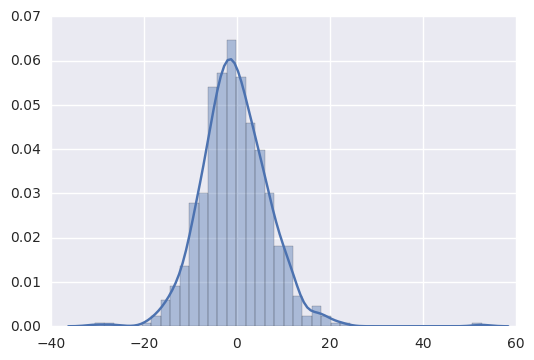

In [9]:
sns.distplot(y_pred-y)

---
### Select features with largest corrcoef

In [10]:
cc=[]
for i in xrange(x.shape[1]):
    cc.append(np.corrcoef(x[:,i],y)[0,1])

### Top 5-10k featurews works the best

In [11]:
M=3000
idx= (cc<np.sort(cc)[M]) | (cc>np.sort(cc)[-M])
selected_cols=np.arange(len(cc))[idx]
x_sel=x[:,selected_cols]

0.95533132308
1.76418522188


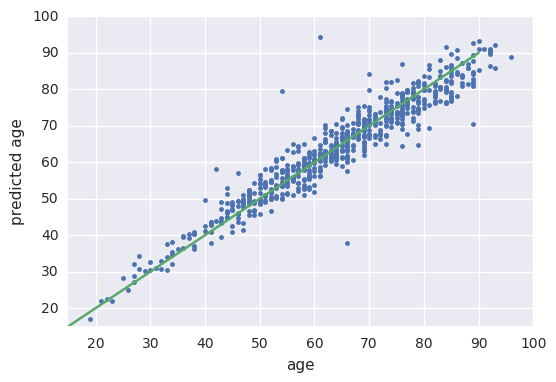

In [12]:
model=LinearRegression()
y_pred=cross_val_predict(model,x_sel,y,cv=10)

plt.plot(y,y_pred,'.')
plt.plot([15,90],[15,90])
plt.xlim(15,100)
plt.ylim(15,100)
plt.xlabel('age')
plt.ylabel('predicted age')
plt.savefig('imgs/corr.png')
print np.corrcoef(y,y_pred)[0,1]
print np.sqrt(m.mean_absolute_error(y,y_pred))

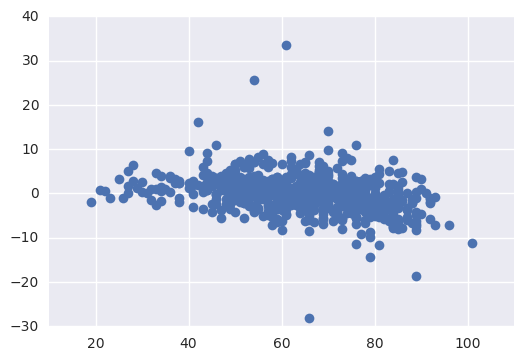

In [13]:
plt.plot(y,y_pred-y,'o')

(-20, 20)

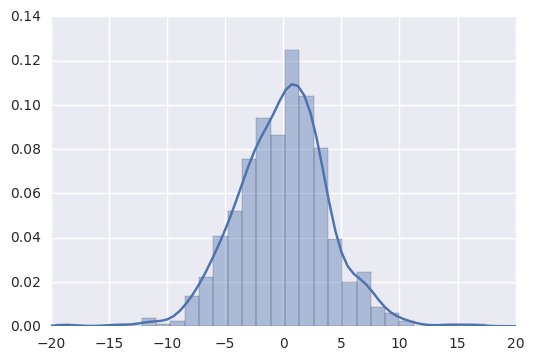

In [14]:
sns.distplot(y_pred-y)
plt.xlim(-20,20)

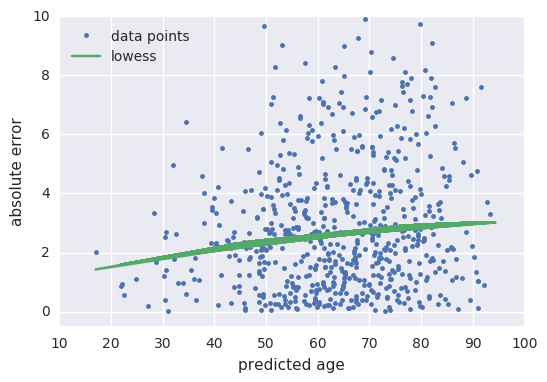

In [15]:
lowess = sm.nonparametric.lowess
z = lowess(np.abs(y_pred-y),y_pred,return_sorted=False)
plt.plot(y_pred,np.abs(y_pred-y),'.',label='data points')
plt.plot(y_pred,z,label='lowess')
plt.ylim(-0.5,10)
plt.legend(loc='best')
plt.ylabel('absolute error')
_=plt.xlabel('predicted age')

### But 3 sites work pretty well too

0.894791874437
2.23389390224


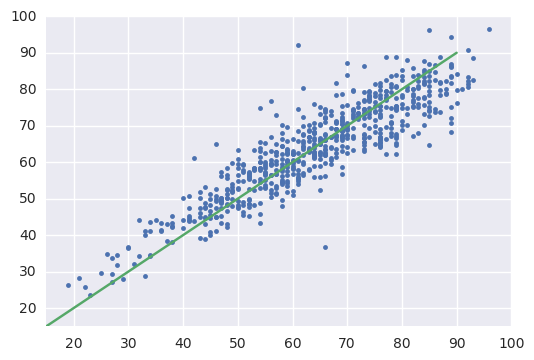

In [16]:
M=2
idx= (cc<np.sort(cc)[M]) | (cc>np.sort(cc)[-M])
selected_cols=np.arange(len(cc))[idx]
x_sel=x[:,selected_cols]

model=LinearRegression()
y_pred=cross_val_predict(model,x_sel,y,cv=10)

plt.plot(y,y_pred,'.')
plt.plot([15,90],[15,90])
plt.xlim(15,100)
plt.ylim(15,100)
print np.corrcoef(y,y_pred)[0,1]
print np.sqrt(m.mean_absolute_error(y,y_pred))

In [17]:
print 'Best 3 sites for age prediction:'
print list(data.columns[selected_cols])

Best 3 sites for age prediction:
['cg10501210', 'cg16867657', 'cg19283806']
